# Análisis Exploratorio de Datos Bancarios

**Autor: Andrés Nó Gómez**


### 0.1 Imports

REQUIREMENTS:
+ Pandas
+ Numpy
+ matplotlib

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 0.2 Funciones / Diccionarios auxiliares

In [72]:
# Funcion que recibe como argumentos un dataframe y listas de nombres de sus columnas.
# Convierte estas columnas al tipo de dato que se indique. En el caso de las fechas, se formatean.

def definir_tipo_datos(df, integer_columns, float_columns, categorical_columns, boolean_columns, date_columns): 
    for col in integer_columns:
        # En algunos casos, venian con decimales aunque no tiene sentido logico. Los redondeamos antes de convertir a entero
        df[col] = pd.to_numeric(df[col].astype(str).str.replace(',', '.'), errors='coerce').round()
        df[col] = df[col].astype('Int64')

    for col in float_columns:
        df[col] = pd.to_numeric(df[col].astype(str).str.replace(',', '.'), errors='coerce').astype('Float64')

    for col in categorical_columns:
        df[col] = df[col].astype('category')
        
    for col in boolean_columns:
        df[col] = df[col].apply(lambda x: True if x == 1 else (False if x == 0 else np.nan)).astype('boolean')

    for col in date_columns:
        # Reemplazar meses por números
        df[col] = df[col].astype(str)
        for mes, num in meses_dict.items():
            df[col] = df[col].str.replace(mes, num, case=False, regex=False)
        # Convertir a tipo fecha
        df[col] = pd.to_datetime(df[col], format='%d-%m-%Y', errors='coerce')

# Diccionario para mapear meses a números
meses_dict = {
    'enero': '01', 'febrero': '02', 'marzo': '03', 'abril': '04',
    'mayo': '05', 'junio': '06', 'julio': '07', 'agosto': '08',
    'septiembre': '09', 'octubre': '10', 'noviembre': '11', 'diciembre': '12'
}

## 1. Comprensión General de los datos

En esta sección exploraremos la estructura y características básicas de nuestros datasets, identificando tipos de variables y dimensiones para establecer las bases del análisis posterior.

Cargamos los registros de contactos a clientes de las campañas de marketing en un DataFrame de Pandas

In [73]:
df_contactos = pd.read_csv('Dataset/bank-additional.csv', sep=',', header=0, index_col=0)
print('Dimensiones del DataFrame de contactos:', df_contactos.shape)
df_contactos.head()


Dimensiones del DataFrame de contactos: (43000, 23)


,age,job,marital,education,default,housing,loan,contact,duration,campaign,...,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,date,latitude,longitude,id_
0,NaN,housemaid,MARRIED,basic.4y,0.00,0.00,0.00,telephone,261,1,...,1.10,"93,994","-36,4","4,857",5191,no,2-agosto-2019,41.49,-71.23,089b39d8-e4d0-461b-87d4-814d71e0e079
1,57.00,services,MARRIED,high.school,NaN,0.00,0.00,telephone,149,1,...,1.10,"93,994","-36,4",NaN,5191,no,14-septiembre-2016,34.60,-83.92,e9d37224-cb6f-4942-98d7-46672963d097
2,37.00,services,MARRIED,high.school,0.00,1.00,0.00,telephone,226,1,...,1.10,"93,994","-36,4","4,857",5191,no,15-febrero-2019,34.94,-94.85,3f9f49b5-e410-4948-bf6e-f9244f04918b
3,40.00,admin.,MARRIED,basic.6y,0.00,0.00,0.00,telephone,151,1,...,1.10,"93,994","-36,4",NaN,5191,no,29-noviembre-2015,49.04,-70.31,9991fafb-4447-451a-8be2-b0df6098d13e
4,56.00,services,MARRIED,high.school,0.00,0.00,1.00,telephone,307,1,...,1.10,"93,994","-36,4",NaN,5191,no,29-enero-2017,38.03,-104.46,eca60b76-70b6-4077-80ba-bc52e8ebb0eb


En un mismo DataFrame, concatenamos las 3 hojas de datos acerca de los clientes del banco que entraron en los años 2012, 2013, 2014

In [74]:
df_clientes = pd.read_excel('Dataset/customer-details.xlsx', sheet_name=None, index_col=0)  # Cargar todas las hojas
df_clientes = pd.concat(df_clientes.values(), ignore_index=True)
print('Dimensiones del DataFrame de clientes:', df_clientes.shape)
df_clientes.head()

Dimensiones del DataFrame de clientes: (43170, 6)


,Income,Kidhome,Teenhome,Dt_Customer,NumWebVisitsMonth,ID
0,161770,1,0,2012-04-04,29,089b39d8-e4d0-461b-87d4-814d71e0e079
1,85477,1,1,2012-12-30,7,e9d37224-cb6f-4942-98d7-46672963d097
2,147233,1,1,2012-02-02,5,3f9f49b5-e410-4948-bf6e-f9244f04918b
3,121393,1,2,2012-12-21,29,9991fafb-4447-451a-8be2-b0df6098d13e
4,63164,1,2,2012-06-20,20,eca60b76-70b6-4077-80ba-bc52e8ebb0eb


### 1.2 Identificación de Variables

#### 1.2.1 Dataframe de contactos

In [75]:
for col, dtype in df_contactos.dtypes.items():
    print(f"Columna: {col} | Tipo de dato: {dtype}")

Columna: age | Tipo de dato: float64
Columna: job | Tipo de dato: object
Columna: marital | Tipo de dato: object
Columna: education | Tipo de dato: object
Columna: default | Tipo de dato: float64
Columna: housing | Tipo de dato: float64
Columna: loan | Tipo de dato: float64
Columna: contact | Tipo de dato: object
Columna: duration | Tipo de dato: int64
Columna: campaign | Tipo de dato: int64
Columna: pdays | Tipo de dato: int64
Columna: previous | Tipo de dato: int64
Columna: poutcome | Tipo de dato: object
Columna: emp.var.rate | Tipo de dato: float64
Columna: cons.price.idx | Tipo de dato: object
Columna: cons.conf.idx | Tipo de dato: object
Columna: euribor3m | Tipo de dato: object
Columna: nr.employed | Tipo de dato: object
Columna: y | Tipo de dato: object
Columna: date | Tipo de dato: object
Columna: latitude | Tipo de dato: float64
Columna: longitude | Tipo de dato: float64
Columna: id_ | Tipo de dato: object


##### Definicion de tipo adecuado de dato en el dataframe de contactos:

In [76]:
# Identificamos las columnas por tipo de dato
integer_columns = ['age','duration','campaign','pdays', 'previous', 'nr.employed','latitude', 'longitude']
float_columns = ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m']
categorical_columns = ['job', 'marital', 'education','contact', 'poutcome']
boolean_columns = ['default', 'housing', 'loan']
date_columns = ['date']

# Realizamos la conversion de tipos de datos
definir_tipo_datos(df_contactos, integer_columns, float_columns, categorical_columns, boolean_columns, date_columns)
df_contactos['y'] = df_contactos['y'].apply(lambda x: True if x == 'yes' else (False if x == 'no' else np.nan)).astype('boolean')
boolean_columns.append('y')

# Verificamos los tipos de datos
for col, dtype in df_contactos.dtypes.items():
    print(f"Columna: {col} | Tipo de dato: {dtype}")

Columna: age | Tipo de dato: Int64
Columna: job | Tipo de dato: category
Columna: marital | Tipo de dato: category
Columna: education | Tipo de dato: category
Columna: default | Tipo de dato: boolean
Columna: housing | Tipo de dato: boolean
Columna: loan | Tipo de dato: boolean
Columna: contact | Tipo de dato: category
Columna: duration | Tipo de dato: Int64
Columna: campaign | Tipo de dato: Int64
Columna: pdays | Tipo de dato: Int64
Columna: previous | Tipo de dato: Int64
Columna: poutcome | Tipo de dato: category
Columna: emp.var.rate | Tipo de dato: Float64
Columna: cons.price.idx | Tipo de dato: Float64
Columna: cons.conf.idx | Tipo de dato: Float64
Columna: euribor3m | Tipo de dato: Float64
Columna: nr.employed | Tipo de dato: Int64
Columna: y | Tipo de dato: boolean
Columna: date | Tipo de dato: datetime64[ns]
Columna: latitude | Tipo de dato: Int64
Columna: longitude | Tipo de dato: Int64
Columna: id_ | Tipo de dato: object


#### 1.2.2 Dataframe de Clientes

In [77]:
for col, dtype in df_clientes.dtypes.items():
    print(f"Columna: {col} | Tipo de dato: {dtype}")

Columna: Income | Tipo de dato: int64
Columna: Kidhome | Tipo de dato: int64
Columna: Teenhome | Tipo de dato: int64
Columna: Dt_Customer | Tipo de dato: datetime64[ns]
Columna: NumWebVisitsMonth | Tipo de dato: int64
Columna: ID | Tipo de dato: object


Los tipos de dato ya se han establecido correctamente por defecto en este dataframe, no tenemos que tocar nada.

## 2. Transformación y Limpieza

En esta sección preparamos los datos para el análisis identificando y tratando duplicados, valores faltantes y anomalías que puedan afectar la calidad del análisis posterior.


### 2.1 Valores Duplicados y Comprension de los IDs


In [78]:
print("Duplicados en contactos:", df_contactos['id_'].duplicated().sum())
print("Duplicados en clientes:", df_clientes['ID'].duplicated().sum())

# Revisar IDs que no están en el otro dataset
ids_contactos = set(df_contactos['id_'])
ids_clientes = set(df_clientes['ID'])

print("IDs en contactos que no están en clientes:", len(ids_contactos - ids_clientes))
print("IDs en clientes que no están en contactos:", len(ids_clientes - ids_contactos))

Duplicados en contactos: 0
Duplicados en clientes: 0
IDs en contactos que no están en clientes: 0
IDs en clientes que no están en contactos: 170


+ No hay filas (ni Ids) duplicados, ni en el dataframe de Contactos ni en el de Clientes.
+ Todos los IDs de los clientes contactadoss del dataset se corresponden a IDs de clientes del banco que entraron entre 2012 y 2014.
+ Hay 170 clientes que entraron entre 2012 y 2014 que no fueron contactados en ninguna campaña.

### 2.2 Valores Faltantes

#### 2.2.1 Dataframe de Contactos

In [79]:
df_contactos.isnull().sum()

age               5120
job                345
marital             85
education         1807
default           8981
housing           1026
loan              1026
contact              0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx     471
cons.conf.idx        0
euribor3m         9256
nr.employed          0
y                    0
date               248
latitude             0
longitude            0
id_                  0
dtype: int64

+ Se encuentran valores faltantes en varias de las columnas. En la mayoría de estas columnas, el número de registros que faltan no es demasiado preocupante (menos del 5% del numero total de registros en 'job', 'marital', 'education', 'housing', 'loan', cons.price.idx, 'date'). 

+ Sin embargo, en las columnas 'age', 'default' y 'euribor3m' si que faltan entre un 11% y un 21% de los registros, valor que es más preocupante. 

##### Estudio de correlaciones entre los valores faltantes

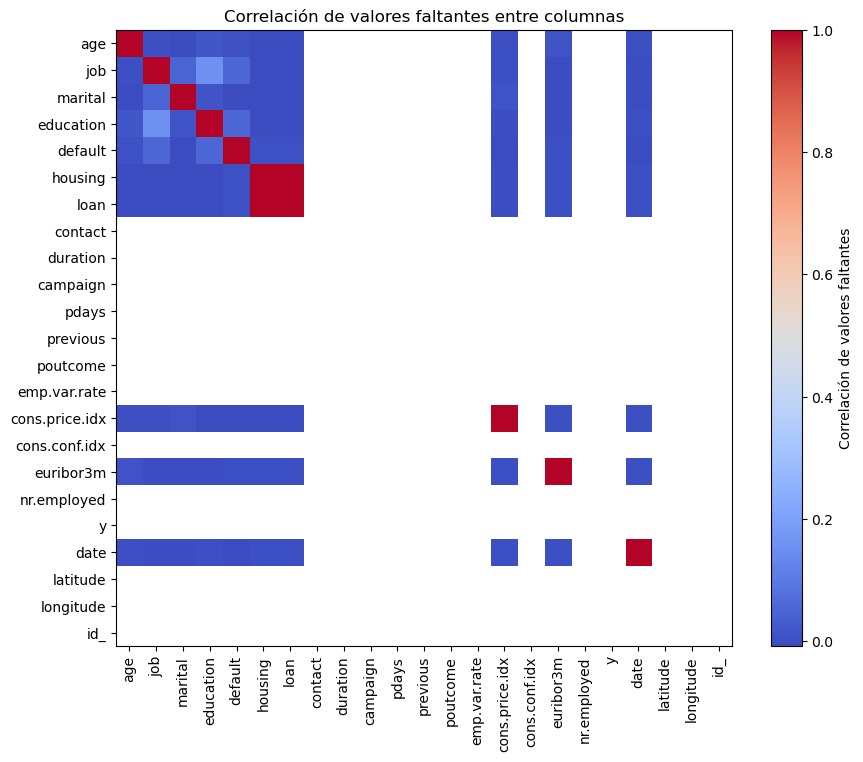

Correlación entre faltantes de 'job' y 'education': 0.15655874054313623
Correlación entre faltantes de 'loan' y 'housing': 1.0


In [80]:
missing_corr = df_contactos.isnull().corr()

plt.figure(figsize=(10,8))
plt.imshow(missing_corr, cmap='coolwarm', interpolation='none')
plt.colorbar(label='Correlación de valores faltantes')
plt.xticks(range(len(missing_corr)), missing_corr.columns, rotation=90)
plt.yticks(range(len(missing_corr)), missing_corr.columns)
plt.title("Correlación de valores faltantes entre columnas")
plt.show()

print("Correlación entre faltantes de 'job' y 'education':", missing_corr.loc['job', 'education'])
print("Correlación entre faltantes de 'loan' y 'housing':", missing_corr.loc['loan', 'housing'])

+ El único patrón que hemos detectado con suficiente evidencia es la correspondencia 1 a 1 de los valores faltantes en las columnas 'loan' y 'housing'. Ambas se refieren a si el cliente recibe préstamos. 

#### Gestión de los valores faltantes.



+ En las columnas categoricas o booleanas, optamos por añadir una nueva categoria 'unknown' porque la propia falta de registro puede ser significativa, especialmente en las columnas 'default' (historial de incumplimiento de pagos), 'housing' o 'loan' (indicador de préstamos).

+ En las columnas numéricas, imputaremos los valores con la mediana de la columna, que es más robusta a outliers que la media y nos permite mantener una ditribución de datos parecida sin perder registros.

+ En la columna de la fecha del último contacto, eliminaremos las filas que no tengan una fecha asociada, por la dificultad de imputar un valor coherente y por que al ser pocos casos no se pierde demasiada información.

In [82]:
# Imputar 'unknown' en las categóricas
for col in categorical_columns:
    df_contactos[col] = df_contactos[col].cat.add_categories('unknown')
    df_contactos[col] = df_contactos[col].fillna('unknown')

# Imputar 'unknown' en las booleanas
for col in boolean_columns:
    df_contactos[col] = df_contactos[col].astype('object').where(df_contactos[col].notnull(), 'unknown')
    df_contactos[col] = df_contactos[col].astype('category')

# Imputar la mediana en las numéricas
for col in integer_columns + float_columns:
    mediana = df_contactos[col].median()
    df_contactos[col] = df_contactos[col].fillna(mediana)

# Eliminar filas con fechas faltantes
df_contactos = df_contactos.dropna(subset=['date'])

Comprobamos que no quedan valores faltantes en nuestro DataFrame

In [41]:
df_contactos.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
date              0
latitude          0
longitude         0
id_               0
dtype: int64

#### 2.2.2 Dataframe de clientes


In [42]:
df_clientes.isnull().sum()

Income               0
Kidhome              0
Teenhome             0
Dt_Customer          0
NumWebVisitsMonth    0
ID                   0
dtype: int64

En este DataFrame, no hay valores faltantes.

### 2.3 Inconsistencias

#### 2.3.1 Columnas sin informacion relevante

##### Dias desde el anterior contacto ('pdays')

In [44]:
df_contactos['pdays'].value_counts()
print(f'El valor 999 está en un {df_contactos["pdays"].value_counts(normalize=True).get(999, 0) * 100:.2f}% del total de registros.')

El valor 999 está en un 96.31% del total de registros.


+ Desconocemos si el valor 999 ha sido registrado todas esas veces por error, o si tiene algún significado. Por tanto, decidimos eliminar la columna ya que no nos está aportando información relevante.

In [45]:
df_contactos = df_contactos.drop(columns=['pdays'])
integer_columns.remove('pdays')

#### 2.3.2 Datos Anómalos



Boxplots de variables numéricas:


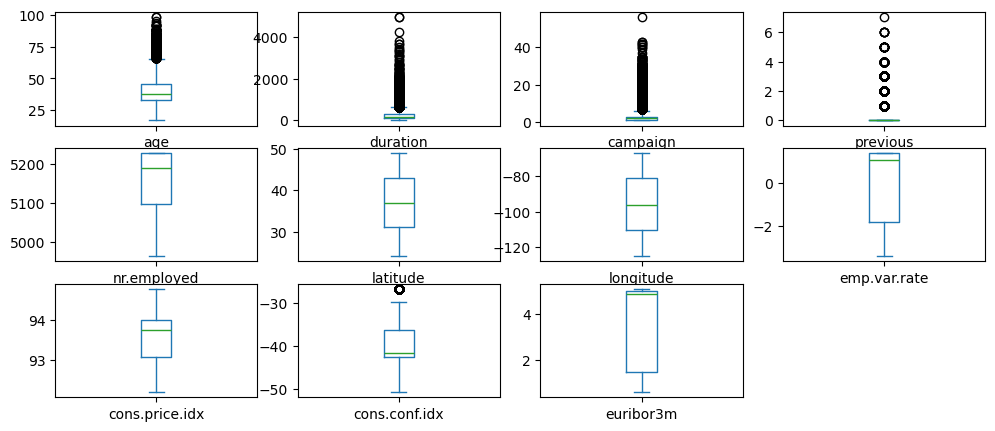

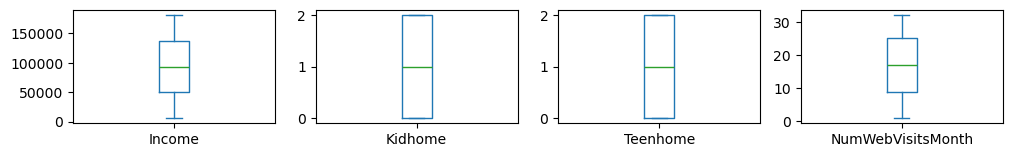

In [46]:
print('Boxplots de variables numéricas:')
_ = df_contactos[integer_columns + float_columns].plot(kind='box', subplots=True, figsize=(12,5), layout=(3,4))
_ = df_clientes.plot(kind='box', subplots=True, figsize=(12,5), layout=(3,4))


+ Se analizarán en mayor detalle las columnas 'age', 'duration', 'campaign', 'previous', 'cons.conf.idx' porque son las que tienen valores que están por debajo de Q1 - 1.5×IQR o por encima de Q3 + 1.5×IQR (marcados en circulos negros en los boxplots). 

In [47]:
# Estadísticas descriptivas de las columnas con outlers
print('Estadísticas descriptivas de las columnas con outliers:')
columnas = ['age', 'duration', 'campaign', 'previous', 'cons.conf.idx']
df_contactos[columnas].describe(include='all')

Estadísticas descriptivas de las columnas con outliers:


,age,duration,campaign,previous,cons.conf.idx
count,42752.00,42752.00,42752.00,42752.00,42752.00
mean,39.75,257.77,2.57,0.17,-40.51
std,9.82,258.78,2.77,0.50,4.64
min,17.00,0.00,1.00,0.00,-50.80
25%,33.00,102.00,1.00,0.00,-42.70
50%,38.00,179.00,2.00,0.00,-41.80
75%,46.00,319.00,3.00,0.00,-36.40
max,98.00,4918.00,56.00,7.00,-26.90


Visualización de la distribución de las variables con outliers:


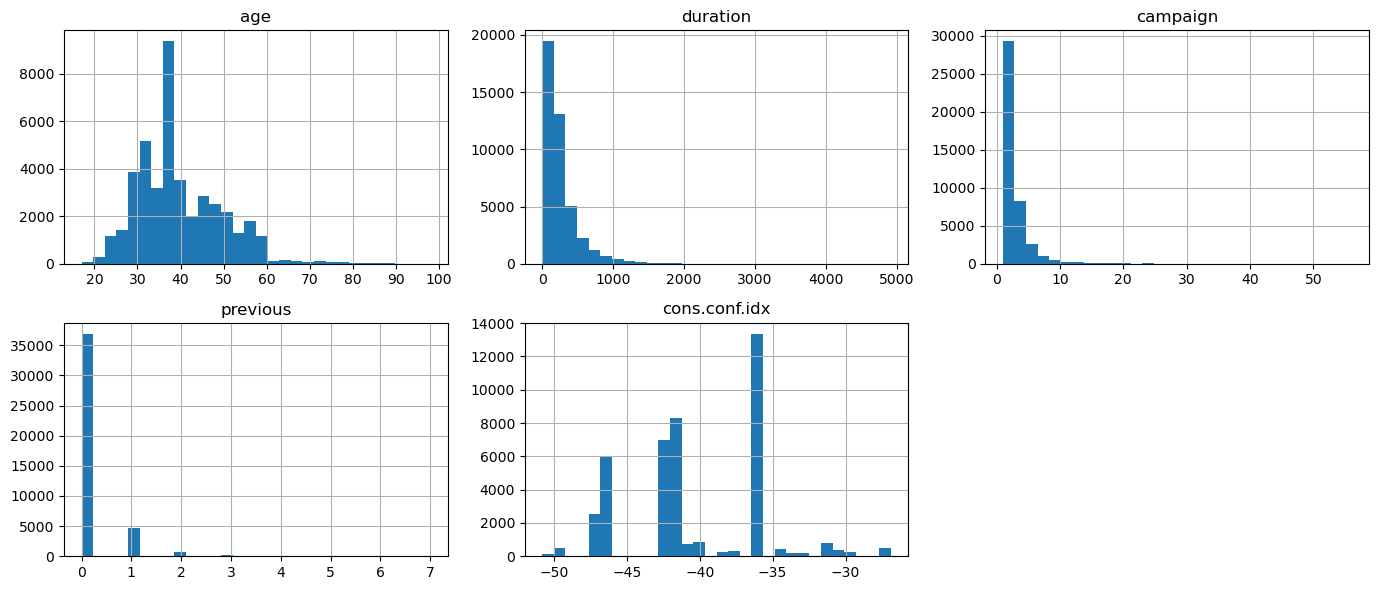

In [48]:
# Visualización de la distribución de las variables mencionadas
print ('Visualización de la distribución de las variables con outliers:')

fig, axes = plt.subplots(2, 3, figsize=(14, 6))
for i, col in enumerate(columnas):
    df_contactos[col].hist(ax=axes.flat[i], bins=30)
    axes.flat[i].set_title(col)
plt.tight_layout()
# Elimina el último eje vacío del grid de subplots
fig.delaxes(axes.flat[-1])
plt.show()

+ **age**: A pesar de la presencia de valores atípicos, se ha decidido conservarlos, ya que representan edades de clientes que, aunque extremas, son demográficamente posibles y podrían ser relevantes para el análisis.

+ **duration**: Se han eliminado los registros donde la duración de la llamada supera los 1500 segundos (25 minutos). Esta decisión se basa en que duraciones tan prolongadas son poco realistas en el contexto de una campaña de telemarketing y distorsionan significativamente las métricas estadísticas, como la media.

+ **campaign**: Se han excluido los registros con más de 15 contactos durante la campaña actual. Un número tan elevado de interacciones con un mismo cliente se considera anómalo y podría indicar un error en el registro de datos o un comportamiento atípico que no es representativo del resto de la muestra.

+ **previous**: No se han realizado modificaciones en esta columna. Aunque existen valores atípicos, estos reflejan un historial de contacto con clientes que, si bien es extenso, es plausible y puede contener información valiosa sobre la relación del cliente con el banco.

+ **cons.conf.idx**: Los valores de esta columna se han mantenido sin cambios. Los valores atípicos observados se encuentran dentro de un rango que puede considerarse razonable para un índice de confianza del consumidor.

In [49]:
# Gestión de outliers

# Recuento inicial de registros
initial_rows = len(df_contactos)
print(f"Número inicial de registros: {initial_rows}")

# Gestión de 'duration'
duration_outliers = df_contactos[df_contactos['duration'] > 1500]
n_duration_outliers = len(duration_outliers)
df_contactos = df_contactos[df_contactos['duration'] <= 1500]
print(f"Registros eliminados por 'duration' > 1500: {n_duration_outliers}")

# Gestión de 'campaign'
campaign_outliers = df_contactos[df_contactos['campaign'] > 15]
n_campaign_outliers = len(campaign_outliers)
df_contactos = df_contactos[df_contactos['campaign'] <= 15]
print(f"Registros eliminados por 'campaign' > 15: {n_campaign_outliers}")

# Recuento final
final_rows = len(df_contactos)
print(f"Número final de registros: {final_rows}")
print(f"Total de registros eliminados: {initial_rows - final_rows}")

Número inicial de registros: 42752
Registros eliminados por 'duration' > 1500: 210
Registros eliminados por 'campaign' > 15: 369
Número final de registros: 42173
Total de registros eliminados: 579


### Guardado de los datasets definitivos en archivos csv.

In [50]:
# Guardar df_clientes
df_clientes.to_csv('Transformed_dataset/clientes.csv', index=False)

# Guardar df_contactos
df_contactos.to_csv('Transformed_dataset/contactos.csv', index=False)

## 3. Análisis Descriptivo

En esta sección exploramos las características estadísticas y distribuciones de las variables en nuestros datasets limpios. El análisis descriptivo nos permite comprender la naturaleza de los datos mediante métricas de tendencia central, dispersión y visualizaciones de distribuciones, proporcionando la base para interpretaciones y análisis posteriores.


In [51]:
# # Leer los dataframes definitivos desde los archivos csv
# df_clientes = pd.read_csv('Transformed_dataset/clientes.csv')
# df_contactos = pd.read_csv('Transformed_dataset/contactos.csv')

### 3.1 Métricas de estadística descriptiva

#### 3.1.1 Dataframe de Contactos

In [52]:
pd.set_option('display.float_format', '{:.2f}'.format) # Para fijar 2 decimales en las tablas a continuacion
print("Resumen columnas numéricas y fechas:")
df_contactos.describe(percentiles=[0.5])

Resumen columnas numéricas y fechas:


,age,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,date,latitude,longitude
count,42173.00,42173.00,42173.00,42173.00,42173.00,42173.00,42173.00,42173.00,42173.00,42173,42173.00,42173.00
mean,39.74,250.53,2.40,0.18,0.07,93.57,-40.51,3.87,5166.38,2017-07-02 02:22:39.485927168,36.87,-95.92
min,17.00,0.00,1.00,0.00,-3.40,92.20,-50.80,0.63,4964.00,2015-01-01 00:00:00,24.00,-125.00
50%,38.00,179.00,2.00,0.00,1.10,93.75,-41.80,4.86,5191.00,2017-07-05 00:00:00,37.00,-96.00
max,98.00,1500.00,15.00,7.00,1.40,94.77,-26.90,5.04,5228.00,2019-12-31 00:00:00,49.00,-67.00
std,9.83,226.52,2.05,0.50,1.58,0.58,4.65,1.62,72.42,NaN,7.23,16.76


In [53]:
# Estadísticas descriptivas para columnas categóricas y booleanas
print("Resumen columnas categóricas:\n")
for col in categorical_columns:
    print(f"Categorías en '{col}': {df_contactos[col].cat.categories.tolist()}\n")
df_contactos[categorical_columns + boolean_columns].describe()

Resumen columnas categóricas:

Categorías en 'job': ['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown']

Categorías en 'marital': ['DIVORCED', 'MARRIED', 'SINGLE', 'unknown']

Categorías en 'education': ['basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown']

Categorías en 'contact': ['cellular', 'telephone', 'unknown']

Categorías en 'poutcome': ['FAILURE', 'NONEXISTENT', 'SUCCESS', 'unknown']



,job,marital,education,contact,poutcome,default,housing,loan,y
count,42173,42173,42173,42173,42173,42173,42173,42173,42173
unique,12,4,8,2,3,3,3,3,2
top,admin.,MARRIED,university.degree,cellular,NONEXISTENT,False,True,False,False
freq,10653,25485,12479,26943,36326,33363,22078,34773,37499


#### 3.1.2 Dataframe de Clientes

In [54]:
df_clientes.describe(percentiles=[0.5])

,Income,Kidhome,Teenhome,Dt_Customer,NumWebVisitsMonth
count,43170.00,43170.00,43170.00,43170,43170.00
mean,93227.39,1.00,1.00,2013-05-11 22:09:47.407922176,16.59
min,5841.00,0.00,0.00,2012-01-01 00:00:00,1.00
50%,93009.50,1.00,1.00,2013-03-01 00:00:00,17.00
max,180802.00,2.00,2.00,2014-12-31 00:00:00,32.00
std,50498.18,0.82,0.82,NaN,9.24


### 3.2 Distribución de Variables: Dataframe de Contactos

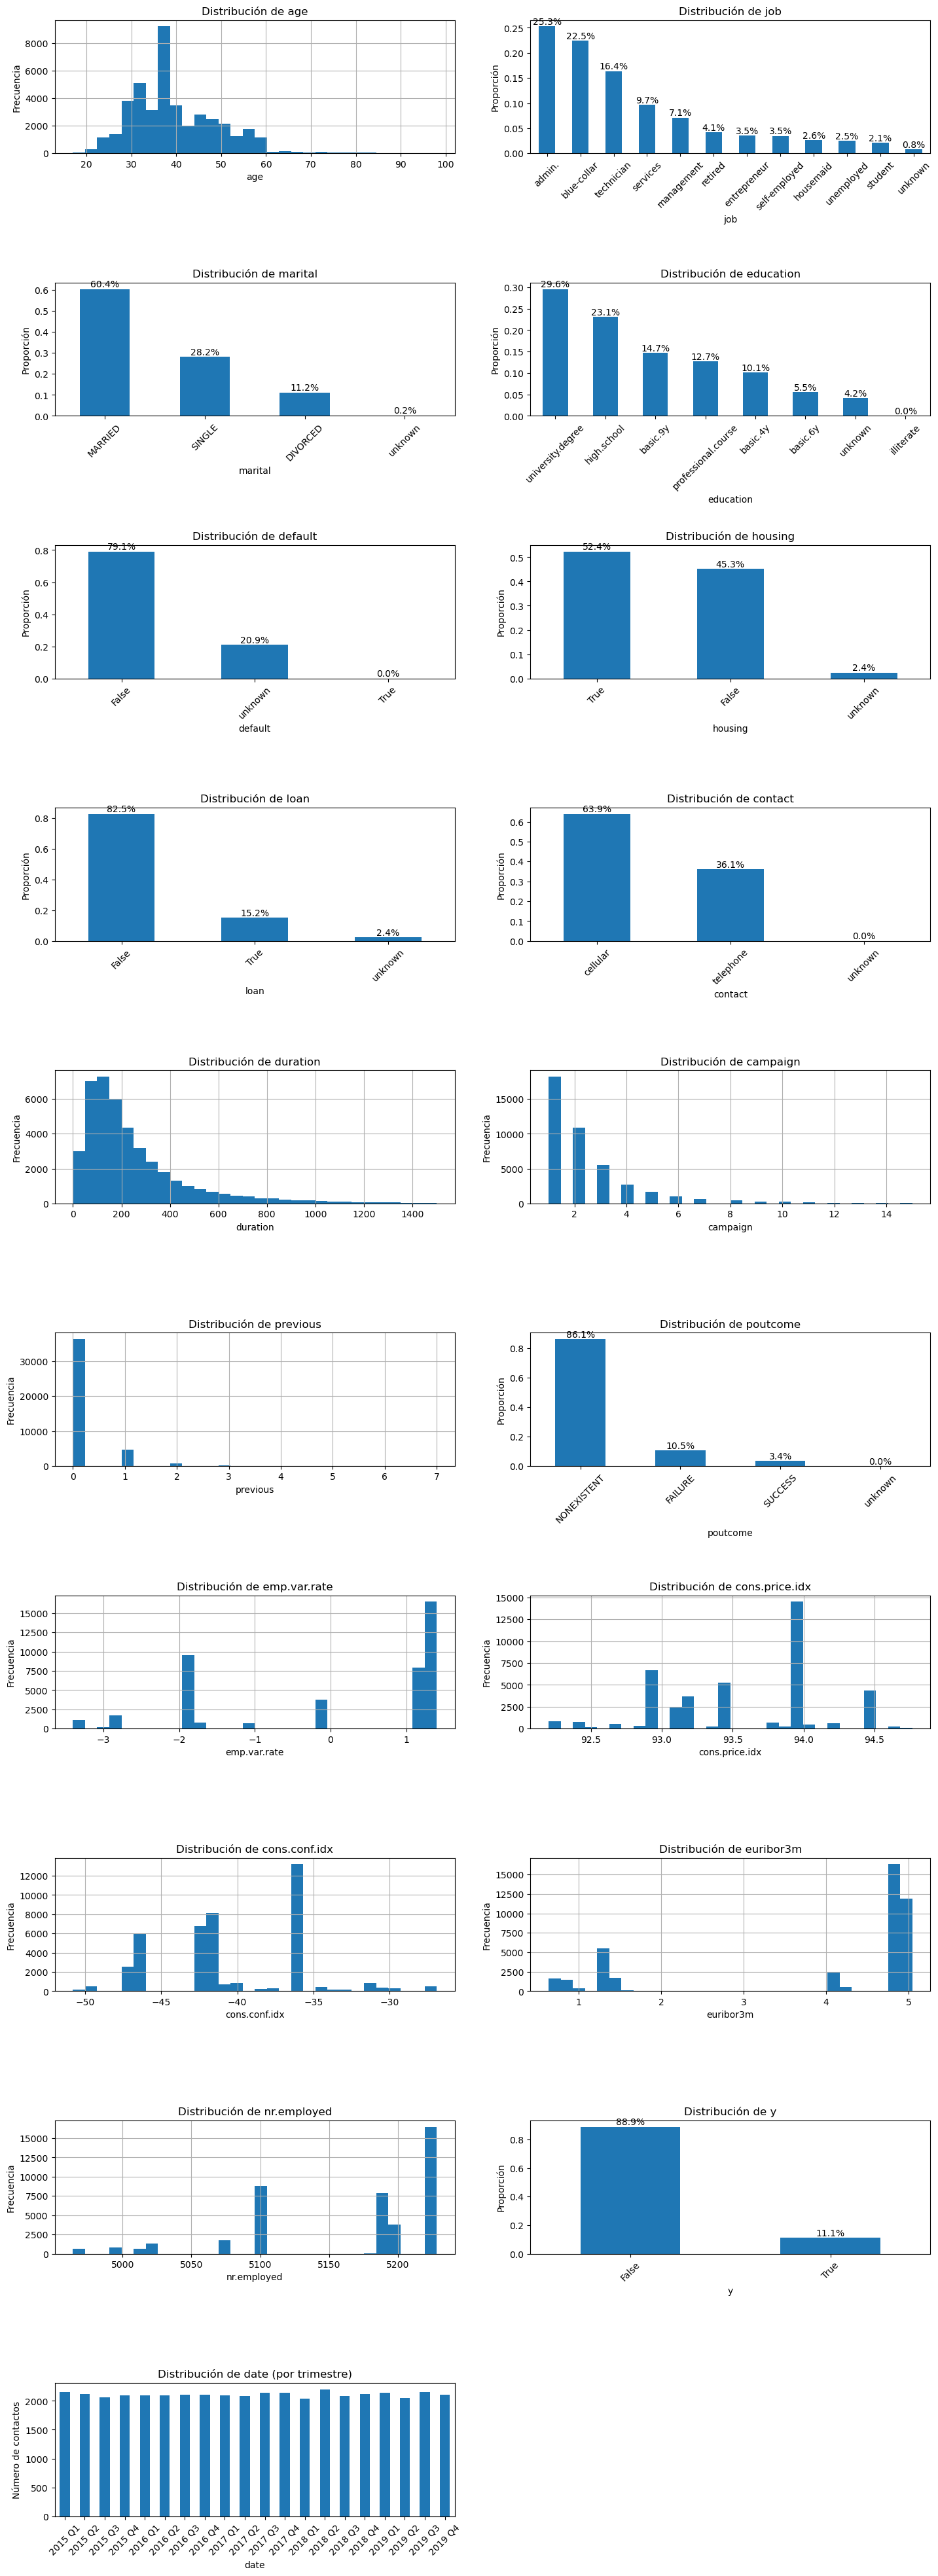

In [55]:

# Lista de columnas a visualizar (excluyendo 'id_', 'latitude', 'longitude')
cols_to_plot = [col for col in df_contactos.columns if col not in ['id_', 'latitude', 'longitude']]

# Asegurarse de que la columna de fecha es de tipo datetime
df_contactos['date'] = pd.to_datetime(df_contactos['date'])

# Definir columnas numéricas y categóricas para la lógica de graficación
numeric_cols = df_contactos.select_dtypes(include=np.number).columns.tolist()
categorical_cols = df_contactos.select_dtypes(include=['category', 'object', 'boolean']).columns.tolist()
date_cols = ['date']

# Crear una figura y un conjunto de subplots
# Calculamos el número de filas necesarias para una cuadrícula de 2 columnas
n_cols = 2
n_rows = 10
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten() # Aplanar el array de ejes para iterar fácilmente

for i, col in enumerate(cols_to_plot):
    ax = axes[i]
    
    if col in numeric_cols:
        df_contactos[col].hist(ax=ax, bins=30)
        ax.set_title(f'Distribución de {col}')
        ax.set_xlabel(col)
        ax.set_ylabel('Frecuencia')
    elif col in categorical_cols:
        # Para categóricas, usamos bar plot
        data = df_contactos[col].value_counts(normalize=True)
        data.plot(kind='bar', ax=ax, rot=45)
        ax.set_title(f'Distribución de {col}')
        ax.set_ylabel('Proporción')
        # Añadir etiquetas de porcentaje
        for index, value in enumerate(data):
            ax.text(index, value, f'{value*100:.1f}%', ha='center', va='bottom')
            
    elif col in date_cols:
        # Para la fecha, un gráfico de barras por trimestre
        quarterly_counts = df_contactos[col].dt.to_period('Q').value_counts().sort_index()
        # Formatear el índice para que sea "YYYY QX"
        quarterly_counts.index = quarterly_counts.index.strftime('%Y Q%q')
        quarterly_counts.plot(kind='bar', ax=ax, rot=45)
        ax.set_title(f'Distribución de {col} (por trimestre)')
        ax.set_ylabel('Número de contactos')

# Ocultar ejes no utilizados
if len(cols_to_plot) < len(axes):
    for j in range(len(cols_to_plot), len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout(pad=3.0)
plt.show()

### 3.2 Distribución de Variables: Datframe de Clientes

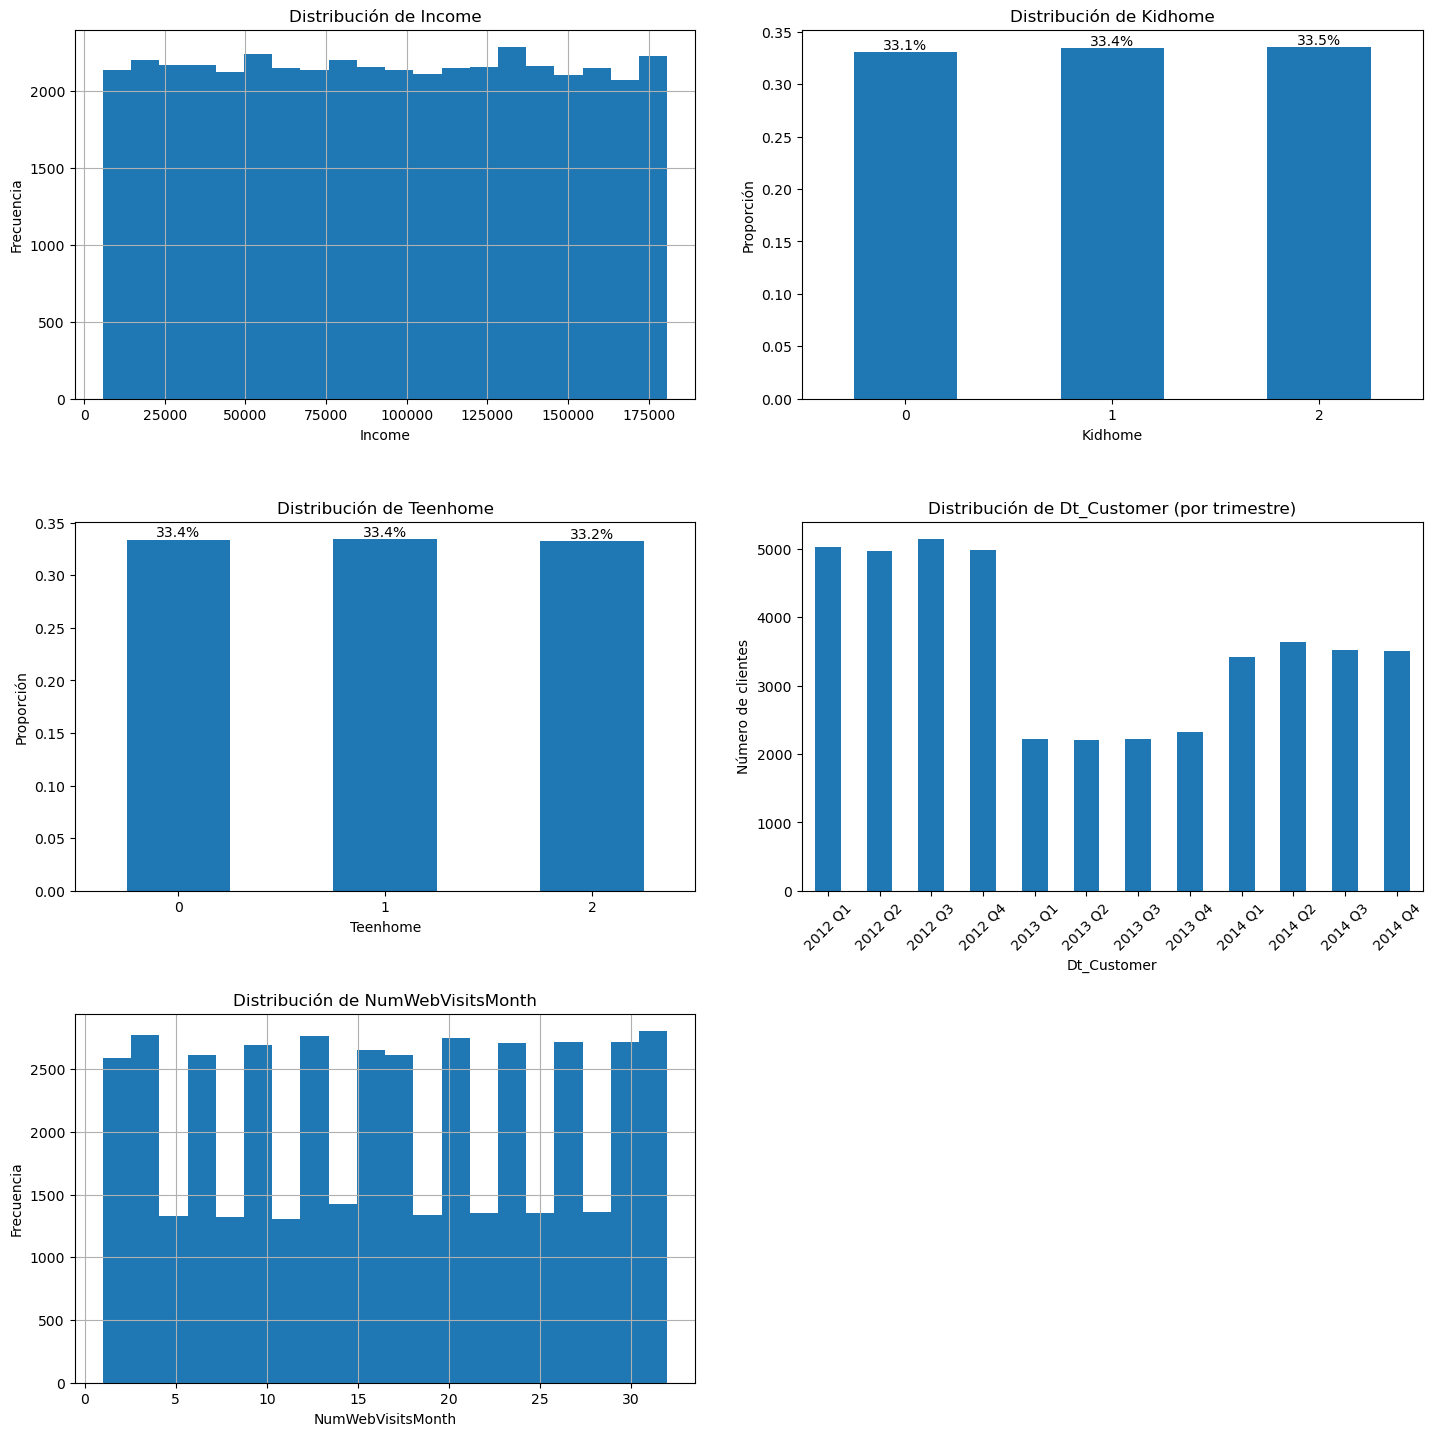

In [56]:

# Definir manualmente las columnas a visualizar y sus tipos
cols_to_plot_clientes = [col for col in df_clientes.columns if col != 'ID']
# Mover Kidhome y Teenhome a las categóricas para su visualización
integer_cols_clientes = ['age', 'Income', 'NumWebVisitsMonth']
categorical_cols_clientes = ['Kidhome', 'Teenhome']
date_cols_clientes = ['Dt_Customer']

# Crear la figura y los subplots
n_cols = 2
n_rows = 3
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
axes = axes.flatten()

# Iterar y graficar
for i, col in enumerate(cols_to_plot_clientes):
    ax = axes[i]
    
    if col in integer_cols_clientes:
        df_clientes[col].hist(ax=ax, bins=20)
        ax.set_title(f'Distribución de {col}')
        ax.set_xlabel(col)
        ax.set_ylabel('Frecuencia')

    elif col in categorical_cols_clientes:
        # Tratar como categórica, incluso si es numérica como Kidhome/Teenhome
        data = df_clientes[col].value_counts(normalize=True).sort_index()
        data.plot(kind='bar', ax=ax, rot=0)
        ax.set_title(f'Distribución de {col}')
        ax.set_ylabel('Proporción')
        # Añadir etiquetas de porcentaje
        for index, value in enumerate(data):
            # Usamos data.index[index] para obtener la etiqueta correcta del eje x
            ax.text(index, value, f'{value*100:.1f}%', ha='center', va='bottom')
            
    elif col in date_cols_clientes:
        # Gráfico de fechas por trimestre
        quarterly_counts = pd.to_datetime(df_clientes[col]).dt.to_period('Q').value_counts().sort_index()
        quarterly_counts.index = quarterly_counts.index.strftime('%Y Q%q')
        quarterly_counts.plot(kind='bar', ax=ax, rot=45)
        ax.set_title(f'Distribución de {col} (por trimestre)')
        ax.set_ylabel('Número de clientes')

# 4. Ocultar ejes no utilizados
if len(cols_to_plot_clientes) < len(axes):
    for j in range(len(cols_to_plot_clientes), len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout(pad=3.0)
plt.show()

### Insights

**Las características más destacadas del análisis descriptivo son:**

+ **Tasa de conversión**: Solo el 11.1% de los contactos resulta en suscripción al producto, indicando la naturaleza selectiva de la oferta bancaria y la necesidad de optimizar las estrategias de contacto.

+ **Concentración ocupacional**: El 22% de los contactos corresponde a trabajadores administrativos, seguido por técnicos (19%) y servicios (13%), sugiriendo una concentración en sectores de clase media que podrían ser target preferencial.

+ **Perfil demográfico**: La edad promedio de contactos es 40 años con ingresos medios de €51,756, representando un segmento maduro con capacidad financiera para productos bancarios especializados.

## 4. Análisis de Correlaciones 

### 4.1 Unión de los DataFrames

Para poder analizar las relaciones entre las variables de marketing (df_contactos) y las demográficas (df_clientes), necesitamos unir ambos DataFrames usando los IDs de los clientes.

Se ha observado anteriormente que todos los IDs de los clientes contactados del dataset se corresponden a IDs de clientes del banco que entraron entre 2012 y 2014. Sin embargo, hay 170 clientes del dataset original que entraron entre 2012 y 2014 que no fueron contactados en ninguna campaña. Realizaremos un inner join para incluir solo clientes que aparezcan en ambos datasets , sobre los que tendremos valores significativos en todas las variables.

In [57]:

# # Preparar los DataFrames para la unión
# # Renombrar la columna id_ en df_contactos para que coincida con ID en df_clientes
df_contactos_clean = df_contactos.rename(columns={'id_': 'ID'})

df_merged = pd.merge(df_contactos_clean, df_clientes, on='ID', how='inner')
print(f"Dimensiones de df_contactos_clean: {df_contactos_clean.shape}")
print(f"Dimensiones de df_clientes: {df_clientes.shape}")
print(f"Dimensiones del DataFrame unido: {df_merged.shape}")
print(f"Columnas disponibles: {list(df_merged.columns)}")
print(f"\nPrimeras 5 filas del DataFrame unido:")
df_merged.head()

Dimensiones de df_contactos_clean: (42173, 22)
Dimensiones de df_clientes: (43170, 6)
Dimensiones del DataFrame unido: (42173, 27)
Columnas disponibles: ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'duration', 'campaign', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'date', 'latitude', 'longitude', 'ID', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'NumWebVisitsMonth']

Primeras 5 filas del DataFrame unido:


,age,job,marital,education,default,housing,loan,contact,duration,campaign,...,y,date,latitude,longitude,ID,Income,Kidhome,Teenhome,Dt_Customer,NumWebVisitsMonth
0,38,housemaid,MARRIED,basic.4y,False,False,False,telephone,261,1,...,False,2019-08-02,41,-71,089b39d8-e4d0-461b-87d4-814d71e0e079,161770,1,0,2012-04-04,29
1,57,services,MARRIED,high.school,unknown,False,False,telephone,149,1,...,False,2016-09-14,35,-84,e9d37224-cb6f-4942-98d7-46672963d097,85477,1,1,2012-12-30,7
2,37,services,MARRIED,high.school,False,True,False,telephone,226,1,...,False,2019-02-15,35,-95,3f9f49b5-e410-4948-bf6e-f9244f04918b,147233,1,1,2012-02-02,5
3,40,admin.,MARRIED,basic.6y,False,False,False,telephone,151,1,...,False,2015-11-29,49,-70,9991fafb-4447-451a-8be2-b0df6098d13e,121393,1,2,2012-12-21,29
4,56,services,MARRIED,high.school,False,False,True,telephone,307,1,...,False,2017-01-29,38,-104,eca60b76-70b6-4077-80ba-bc52e8ebb0eb,63164,1,2,2012-06-20,20


### 4.2 Matriz de Correlación usando NumPy

Ahora utilizaremos NumPy para calcular la matriz de correlación entre todas las variables numéricas. Las variables booleanas se pueden incluir fácilmente en este análisis codificándolas a 0s y 1s en lugar de False o True. Para permitir esto, eliminaremos puntualmente para este análisis los regsitros en los que alguna booleana sea 'unknown', ya que hemos visto en el análsis de frecuencias que son pocos los casos. Esto nos ayudará a identificar relaciones lineales entre las variables.

In [58]:
### 4.4 Análisis incluyendo Variables Booleanas

# Codificar variables booleanas a 0 y 1 para incluirlas en el análisis de correlación
df_merged_encoded = df_merged.copy()

# Variables booleanas a codificar
boolean_vars = ['default', 'housing', 'loan', 'y']

# Eliminar registros con 'unknown' en alguna de las variables booleanas
for var in boolean_vars:
    if var in df_merged_encoded.columns:
        df_merged_encoded = df_merged_encoded[df_merged_encoded[var] != 'unknown']

# Convertir booleanos a 0 y 1
for var in boolean_vars:
    if var in df_merged_encoded.columns:
        df_merged_encoded[f'{var}_num'] = df_merged_encoded[var].map({'True': 1, 'False': 0, True: 1, False: 0})

# Seleccionar columnas numéricas + booleanas codificadas
numeric_and_bool = df_merged.select_dtypes(include=[np.number]).columns.tolist()
boolean_encoded = [f'{var}_num' for var in boolean_vars if var in df_merged_encoded.columns]

all_numeric_cols = numeric_and_bool + boolean_encoded
# Excluir IDs y coordenadas
all_numeric_cols = [col for col in all_numeric_cols if col not in ['ID', 'latitude', 'longitude']]

# Crear matriz de correlación expandida
df_all_numeric = df_merged_encoded[all_numeric_cols]
correlation_matrix_full = np.corrcoef(df_all_numeric.T)

# Visualizar matriz de correlación expandida
plt.figure(figsize=(12, 10))
im = plt.imshow(correlation_matrix_full, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar(im, label='Correlación')
plt.xticks(range(len(all_numeric_cols)), all_numeric_cols, rotation=90)
plt.yticks(range(len(all_numeric_cols)), all_numeric_cols)
plt.title('Matriz de Correlación (Numéricas + Booleanas)')
plt.tight_layout()
plt.show()

# TOP 10 correlaciones incluyendo booleanas
correlaciones_all = []
for i in range(len(all_numeric_cols)):
    for j in range(i+1, len(all_numeric_cols)):
        correlaciones_all.append({
            'Variable_1': all_numeric_cols[i],
            'Variable_2': all_numeric_cols[j],
            'Correlacion': correlation_matrix_full[i, j]
        })

df_correlaciones_all = pd.DataFrame(correlaciones_all)
df_top_10_all = df_correlaciones_all.reindex(df_correlaciones_all['Correlacion'].abs().sort_values(ascending=False).index).head(10)

print("TOP 10 CORRELACIONES (Incluyendo Variables Booleanas):")
df_top_10_all

AttributeError: 'float' object has no attribute 'shape'

### 4.3 Interpretación de Correlaciones

**Variables Macroeconómicas (correlaciones positivas altas):**
Las variables macroeconómicas e indices de empleo muestran correlaciones extremadamente fuertes entre sí (euribor3m, emp.var.rate, cons.price.idx, cons.conf.idx, nr.employed). Esto es esperado ya que todos estos indicadores reflejan el estado general de la economía y tienden a moverse de forma coordinada durante ciclos económicos.

**Variables demográficas (correlaciones bajas):**
Las correlaciones entre variables demográficas de los clientes (edad, ingresos, visitas web) son débiles, indicando que estas características son relativamente independientes entre sí.

### 4.4 Análisis de Relación con la Variable Objetivo

En esta sección evaluamos cómo las diferentes variables independientes se relacionan con la variable objetivo `y` (suscripción al producto / servicio):

**1. Correlaciones con Variables Numéricas y Booleanas**: Utilizamos coeficientes de correlación de Pearson para medir la relación lineal entre variables cuantitativas y la variable objetivo. Para este análisis empleamos una versión filtrada del dataset que excluye registros con valores 'unknown' en las variables booleanas, permitiendo su codificación numérica (0/1) y facilitando el cálculo matricial de correlaciones.

**2. Análisis de Tasas de Éxito por Categorías**: Para las variables categóricas, calculamos y comparamos los porcentajes de éxito (conversión) de cada categoría contra la tasa general, identificando segmentos de clientes con mayor o menor propensión a suscribirse al producto.

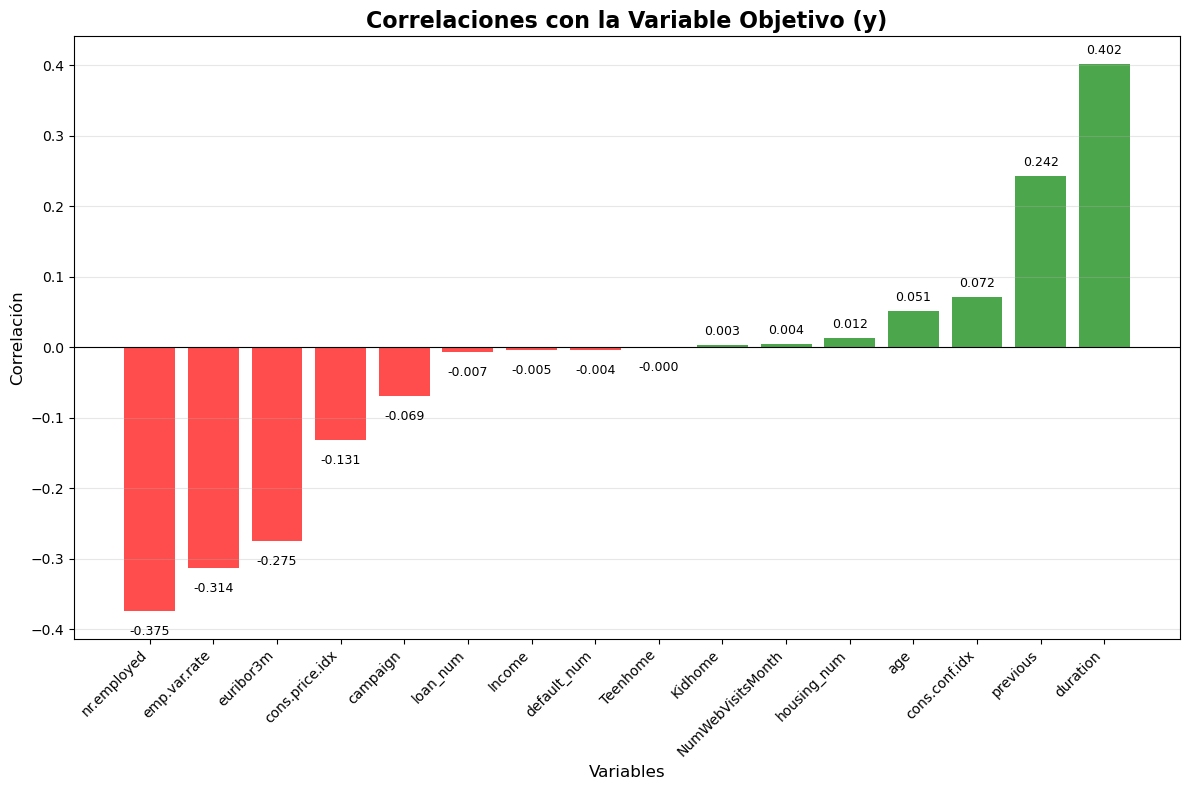

In [ ]:
çç# Crear gráfico de barras con correlaciones positivas hacia arriba y negativas hacia abajo
plt.figure(figsize=(12, 8))
colors = ['red' if x < 0 else 'green' for x in df_y_correlations['Correlacion']]
bars = plt.bar(range(len(df_y_correlations)), df_y_correlations['Correlacion'], color=colors, alpha=0.7)

# Personalizar el gráfico
plt.axhline(y=0, color='black', linestyle='-', linewidth=0.8)
plt.title('Correlaciones con la Variable Objetivo (y)', fontsize=16, fontweight='bold')
plt.xlabel('Variables', fontsize=12)
plt.ylabel('Correlación', fontsize=12)
plt.xticks(range(len(df_y_correlations)), df_y_correlations['Variable'], rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

# Añadir valores de correlación en las barras
for i, (bar, value) in enumerate(zip(bars, df_y_correlations['Correlacion'])):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + (0.01 if height > 0 else -0.02),
             f'{value:.3f}', ha='center', va='bottom' if height > 0 else 'top', fontsize=9)

plt.tight_layout()
plt.show()

### Insights

**Principales conclusiones del análisis de correlaciones con la variable objetivo:**

+ **Variables con correlación positiva más fuerte**: `duration` (duración de la llamada) muestra la correlación más alta con el éxito de la campaña, sugiriendo que llamadas más largas tienden a ser más efectivas.

+ **Variables económicas impactan negativamente**: Las variables macroeconómicas como `euribor3m`, `emp.var.rate` y `nr.employed` presentan correlaciones negativas, indicando que en períodos de mejor situación económica, la disposición a suscribirse disminuye.

+ **Variables demográficas tienen bajo impacto**: La edad de los clientes y sus ingresos muestran correlaciones muy débiles con la variable objetivo, sugiriendo que el perfil demográfico no es determinante para el éxito.

+ **Historial de contactos es relevante**: El número de contactos previos (`previous`) presenta una correlación positiva moderada, indicando que clientes contactados anteriormente tienen mayor probabilidad de éxito.

### 4.5 Análisis del Impacto de Variables Categóricas

Para evaluar cómo las variables categóricas afectan la variable objetivo, utilizaremos varios enfoques complementarios:

In [ ]:
# Análisis de Porcentajes de Éxito (Variable y)

print("ANÁLISIS DE PORCENTAJES DE ÉXITO EN LA VARIABLE OBJETIVO")
print("=" * 60)

# 1. Porcentaje general de "sí" en la variable y
total_records = len(df_merged)
success_records = len(df_merged[df_merged['y'] == True])
general_success_rate = (success_records / total_records) * 100

print(f"PORCENTAJE GENERAL DE ÉXITO:")
print(f"Total de registros: {total_records:,}")
print(f"Registros con éxito (y=True): {success_records:,}")
print(f"Porcentaje de éxito general: {general_success_rate:.2f}%")
print()

# 2. Porcentaje de "sí" por cada categoría de las variables categóricas
print("PORCENTAJE DE ÉXITO POR CATEGORÍAS:")
print("-" * 40)

for var in categorical_vars:
    if var in df_merged.columns:
        print(f"\nVariable: {var.upper()}")
        print("-" * 25)
        
        # Calcular porcentajes por categoría
        category_stats = []
        for category in df_merged[var].unique():
            if pd.notna(category):  # Evitar valores NaN
                subset = df_merged[df_merged[var] == category]
                total_category = len(subset)
                success_category = len(subset[subset['y'] == True])
                success_rate = (success_category / total_category) * 100 if total_category > 0 else 0
                
                category_stats.append({
                    'Categoria': category,
                    'Total': total_category,
                    'Exitos': success_category,
                    'Porcentaje_Exito': success_rate
                })
        
        # Crear DataFrame y ordenar por porcentaje de éxito (descendente)
        df_var = pd.DataFrame(category_stats)
        df_var = df_var.sort_values('Porcentaje_Exito', ascending=False)
        
        # Mostrar el DataFrame
        display(df_var)

ANÁLISIS DE PORCENTAJES DE ÉXITO EN LA VARIABLE OBJETIVO
PORCENTAJE GENERAL DE ÉXITO:
Total de registros: 42,173
Registros con éxito (y=True): 4,674
Porcentaje de éxito general: 11.08%

PORCENTAJE DE ÉXITO POR CATEGORÍAS:
----------------------------------------

Variable: JOB
-------------------------


,Categoria,Total,Exitos,Porcentaje_Exito
11,student,891,280,31.43
5,retired,1748,443,25.34
7,unemployed,1043,150,14.38
2,admin.,10653,1365,12.81
6,management,2997,330,11.01
9,unknown,339,37,10.91
4,technician,6897,740,10.73
8,self-employed,1463,155,10.59
0,housemaid,1101,106,9.63
10,entrepreneur,1485,118,7.95



Variable: MARITAL
-------------------------


,Categoria,Total,Exitos,Porcentaje_Exito
3,unknown,82,12,14.63
1,SINGLE,11885,1643,13.82
2,DIVORCED,4721,473,10.02
0,MARRIED,25485,2546,9.99



Variable: EDUCATION
-------------------------


,Categoria,Total,Exitos,Porcentaje_Exito
7,illiterate,18,4,22.22
5,unknown,1774,255,14.37
6,university.degree,12479,1685,13.50
4,professional.course,5362,599,11.17
1,high.school,9750,1046,10.73
0,basic.4y,4250,429,10.09
2,basic.6y,2340,180,7.69
3,basic.9y,6200,476,7.68



Variable: CONTACT
-------------------------


,Categoria,Total,Exitos,Porcentaje_Exito
1,cellular,26943,3925,14.57
0,telephone,15230,749,4.92



Variable: POUTCOME
-------------------------


,Categoria,Total,Exitos,Porcentaje_Exito
2,SUCCESS,1419,929,65.47
1,FAILURE,4428,623,14.07
0,NONEXISTENT,36326,3122,8.59


#### Insights

**El análisis compara los porcentajes de éxito (tasa de conversión) entre diferentes categorías de cada variable categórica contra el 11.08% de éxito general, revelando patrones significativos:**

+ **JOB**: Los estudiantes (31.43%) y jubilados (25.34%) presentan tasas de éxito muy superiores al promedio, mientras que trabajadores blue-collar (6.62%) y servicios (7.90%) muestran las menores tasas de conversión.

+ **MARITAL**: Los clientes solteros (13.82%) superan significativamente a casados (9.99%) y divorciados (10.02%), sugiriendo mayor flexibilidad financiera en solteros.

+ **EDUCATION**: Destaca la educación universitaria (13.50%) con tasas superiores al promedio. Aunque los analfabetos muestran 22.22%, son solo 18 casos, insuficientes para conclusiones fiables.

+ **CONTACT**: El contacto celular (14.57%) es casi 3 veces más efectivo que el teléfono fijo (4.92%), evidenciando la importancia del canal de comunicación moderno.

+ **POUTCOME**: Los clientes con éxito previo (65.47%) tienen una tasa de conversión excepcional, 6 veces superior al promedio general, confirmando la importancia del historial positivo.

**Implicación estratégica**: Las variables categóricas revelan segmentación clara de audiencias con diferencias de hasta 25 puntos porcentuales entre categorías, siendo cruciales para la personalización de campañas.